In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload
%autoreload 2

pd.set_option('display.min_row', 25)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_colwidth', 300)

### Possible additional datasets:

- Current Land Use Zoning Detail: https://data.seattle.gov/Land-Base/Current-Land-Use-Zoning-Detail/9nvb-wk9b
- *Bike Rack Locations* (Contains lat&long): https://data.seattle.gov/Land-Base/Bike-Racks/pbej-cxb2
- *Marked Crosswalks* (Contains various, including at signal or stop sign): https://data.seattle.gov/Land-Base/Marked-Crosswalks/dx75-5pzj
- Seattle Light Poles Location (Contains lat&long): https://data.seattle.gov/Land-Base/Seattle-City-Light-Poles/f4y8-37gx
- Traffic Signals (DOES NOT HAVE LAT&LONG) Contains if there is a bike signal or not): https://data.seattle.gov/Land-Base/Traffic-Signals/s63a-bkj8
- *Traffic Circles* (Contains lat&long): https://data.seattle.gov/Land-Base/Traffic-Circles/hw9f-j7b8
- *Radar Speed Signs* (Contains lat&long): https://data.seattle.gov/Land-Base/Radar-Speed-Signs/siht-4gsh

##### Unrelated: 
- Areaways: https://data.seattle.gov/Land-Base/Areaways/nmja-kgz6

## Import in all the datasets

In [3]:
streets = pd.read_csv('../data/Seattle_Streets.csv')

In [2]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

In [4]:
# set datetime as index
collisions = collisions.set_index('Datetime').sort_index()

In [5]:
collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,909,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N
2004-01-01,-122.316863,47.615847,18457,32216,32216,1775182,Matched,Block,NaN,12TH AVE BETWEEN E PINE ST AND E OLIVE ST,NaN,NaN,1,Property Damage Only Collision,Other,5,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001022.0,NaN,23,From same direction - all others,0,0,N
2004-01-01,NaN,NaN,18014,31860,31860,1789485,Matched,Block,NaN,AURORA AVE N BETWEEN BATTERY ST TUNNEL NB AND THOMAS ST,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,3,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001017.0,Y,13,From same direction - both going straight - both moving - rear-end,0,0,N
2004-01-01,-122.314210,47.664908,10643,24534,24534,1780964,Matched,Intersection,25792.0,BROOKLYN AVE NE AND NE 50TH ST,NaN,NaN,2,Injury Collision,Left Turn,7,0,0,2,2,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,0,Raining,Wet,Daylight,NaN,4001023.0,NaN,28,From opposite direction - one left turn - one straight,0,0,N
2004-01-01,-122.293643,47.721985,3443,16991,16991,1780749,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN NE 127TH ST AND NE 130TH ST,NaN,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Daylight,NaN,4001005.0,NaN,14,From same direction - both going straight - one stopped - rear-end,0,0,N


#### Bike Racks

In [2]:
bikeracks = pd.read_csv('../data/Bike_Racks.csv')

#### Radar

In [3]:
radar = pd.read_csv('../data/Radar_Speed_Signs.csv')

#### Traffic Circles

In [4]:
traf_circles = pd.read_csv('../data/Traffic_Circles.csv')

#### Marked Crosswalks

In [5]:
marked_cross = pd.read_csv('../data/Marked_Crosswalks.csv')

## Calculate Distance between 2 coordinates

In [44]:
import geopy.distance

Testing out a pair of coordinates

In [45]:
coords_1 = (marked_cross['SHAPE_LAT'][0], marked_cross['SHAPE_LNG'][0])
coords_2 = (collisions['Y'][0], collisions['X'][0])

print(geopy.distance.distance(coords_1, coords_2).miles)

0.8601319867886356


### Finding Nearest Point (in miles)

In [130]:
# import in library to help display progress bar of iterables

from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()

In [95]:
# make new dataset and get rid of nan values in collisions
new_collisions = collisions.copy()

In [96]:
# temporarily fill with 0 in order to avoid errors when calculating distance that has no latitude/longitude
new_collisions['Y'].fillna(value=0, inplace=True)
new_collisions['X'].fillna(value=0, inplace=True)

For each dataset, create a new column with the latitude and longitude value as a tuple since it is the input type for the geopy.distance.distance

In [137]:
new_collisions['latlon_tup'] = list(zip(new_collisions['Y'], new_collisions['X']))
marked_cross['latlon_tup'] = list(zip(marked_cross['SHAPE_LAT'], marked_cross['SHAPE_LNG']))
radar['latlon_tup'] = list(zip(radar['SHAPE_LAT'], radar['SHAPE_LNG']))
bikeracks['latlon_tup'] = list(zip(bikeracks['SHAPE_LAT'], bikeracks['SHAPE_LNG']))
traf_circles['latlon_tup'] = list(zip(traf_circles['SHAPE_LAT'], traf_circles['SHAPE_LNG']))

Define a function that will calculate the distance of collisions to each of the locations of the features and find the closest one to the collision.

NOTE: As you can see in the later cell, it takes about an hr to run through everything and find the nearest radar sign to each collision. For now, it will do because the calculated data will be added onto a new copy of the collisions dataset and saved as a csv.

WORK ON: finding more optimal function because the other additional dataset has significantly more rows than the radar. It will not be a fun time running it all.

In [138]:
def calc_latlon(collisions_latlon, feature_latlon):
    '''
    Input:
    collisions_latlon: Pd.Series of latlon tuples
    feature_latlon: Pd.Series of latlon tuples
    
    Returns:
    new column of nearest distance for feature
    '''
    dist_vals = []
    for i in tqdm(collisions_latlon):
        if i == (0,0):
            dist_vals.append(0)
        else:
            smallest = 100
            for x in feature_latlon:
                temp = geopy.distance.distance(i, x).miles
                if temp < smallest:
                    smallest = temp
            dist_vals.append(smallest)
    return dist_vals

In [139]:
testing = calc_latlon(new_collisions['latlon_tup'], radar['latlon_tup'])

100%|██████████| 220338/220338 [1:02:25<00:00, 58.83it/s]


In [143]:
new_collisions['nearest_radar'] = testing

In [149]:
# new_collisions.to_csv('../data/collisions_radar.csv')

In [150]:
new_collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,nearest_radar
count,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,71472.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220337.000000,1.272050e+05,220338.000000,2.203380e+05,220338.000000
mean,-118.188990,46.007952,110169.500000,143809.710463,144031.876830,37601.430980,2.227119,0.038155,0.027294,1.730614,0.373839,0.015168,0.001675,13.382124,7.971063e+06,262.542689,9.621717e+03,0.860218
std,22.124956,8.612848,63606.246144,88381.117503,88747.658541,51864.925192,1.471631,0.201883,0.164355,0.829109,0.732377,0.158098,0.044503,7.306179,2.611523e+06,3255.640460,7.162528e+04,0.516692
min,-122.419091,0.000000,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00,0.000000
25%,-122.348026,47.571559,55085.250000,71371.250000,71371.250000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00,0.449885
50%,-122.329103,47.614673,110169.500000,126657.500000,126657.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00,0.809056
75%,-122.308185,47.662983,165253.750000,208221.750000,208421.750000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00,1.230370
max,0.000000,47.734142,220338.000000,332492.000000,333992.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06,2.271132


Some simple EDA to see if there are big differences of the nearest radar location and the severity of the crash. So far, does not seem like there is.

In [179]:
person_count = new_collisions[['PEDCOUNT', 'PERSONCOUNT', 'VEHCOUNT', 'SEVERITYCODE', 'SPEEDING', 'nearest_radar']]

In [180]:
person_count.groupby('SEVERITYCODE').mean()

,PEDCOUNT,PERSONCOUNT,VEHCOUNT,nearest_radar
SEVERITYCODE,,,,
0,0.000000,0.189456,0.000000,0.787206
1,0.005286,2.329481,1.946840,0.869331
2,0.112199,2.714071,1.870690,0.866616
2b,0.317192,2.581085,1.574586,0.844381
3,0.433526,2.982659,1.450867,0.851734


Simple EDA of whether the crash involved speeding and the average distance of the nearest radar. The thought was that if there is a radar nearby, speeding would be less likely. This will need more exploration as well.

In [155]:
speed_radar = new_collisions[['ADDRTYPE', 'SPEEDING', 'nearest_radar']]

In [156]:
speed_radar.head()

,ADDRTYPE,SPEEDING,nearest_radar
Datetime,,,
2003-10-06,Intersection,NaN,1.788188
2004-01-01,Block,NaN,1.252224
2004-01-01,Block,Y,0.000000
2004-01-01,Intersection,NaN,1.348987
2004-01-01,Block,NaN,0.198203


In [163]:
speed_radar.groupby('SPEEDING').mean()

,nearest_radar
SPEEDING,
Y,0.793811


In [167]:
# average radar distance with no speeding recorded (NaN values for speeding)
speed_radar[speed_radar['SPEEDING'] != 'Y']['nearest_radar'].mean()

0.86333170626118

In [168]:
speed_radar.groupby('ADDRTYPE').mean()

,nearest_radar
ADDRTYPE,
Alley,0.000000
Block,0.864305
Intersection,0.907029


### Quick correlation heatmap

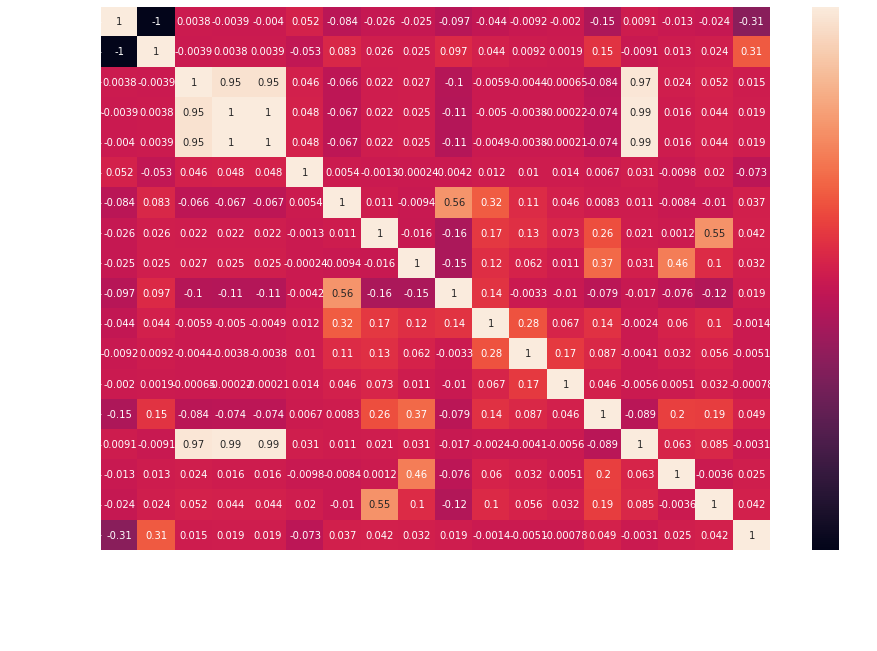

In [176]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(new_collisions.corr(), annot=True)